In [6]:
import tensorflow as tf
import numpy as np

In [3]:
x_data = np.float32(np.random.rand(2, 100))
y_data = np.dot([0.100, 0.200], x_data) + 0.300

b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, x_data) + b

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [[ 0.07946634  0.51821941]] [ 0.35325295]
20 [[ 0.10838716  0.25376013]] [ 0.26513833]
40 [[ 0.10775847  0.2158549 ]] [ 0.28666383]
60 [[ 0.10333439  0.20538473]] [ 0.29506689]
80 [[ 0.10127085  0.20192254]] [ 0.29819229]
100 [[ 0.10046965  0.2006972 ]] [ 0.29933938]
120 [[ 0.10017203  0.20025399]] [ 0.29975879]
140 [[ 0.10006285  0.20009264]] [ 0.29991195]
160 [[ 0.10002296  0.20003381]] [ 0.29996786]
180 [[ 0.10000837  0.20001234]] [ 0.29998827]
200 [[ 0.10000305  0.20000449]] [ 0.29999572]


In [8]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.], [2.]])
product = tf.matmul(matrix1, matrix2)

In [10]:
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()

[[ 12.]]


In [17]:
sess = tf.InteractiveSession()
x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])
x.initializer.run()
sub = tf.subtract(x, a)
print(sub.eval())

[-2. -1.]


In [20]:
state = tf.Variable(0, name="counter")
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)
init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(state))
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

0
1
2
3


In [22]:
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2, input3)
mul = tf.multiply(input1, intermed)
with tf.Session() as sess:
    result = sess.run([mul, intermed])
    print(result)

[21.0, 7.0]


In [29]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)
with tf.Session() as sess:
    print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))

[array([ 14.], dtype=float32)]


In [30]:
"""Functions for downloading and reading MNIST data."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
import tempfile

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

In [3]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder("float", [None, 10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print('Running...')
    for i in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x : batch_xs, y_ : batch_ys})
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print('Result: ',
          sess.run(accuracy,
                   feed_dict={x : mnist.test.images, y_ : mnist.test.labels}))

Running...
Result:  0.9149


In [7]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                         strides=[1, 2, 2, 1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1, 28, 28, 1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_ * tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(500):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                    x:batch[0], y_:batch[1], keep_prob: 1.0
                })
            print('step %d, training accuracy %g' %(i, train_accuracy))
        train_step.run(feed_dict={
                    x:batch[0], y_:batch[1], keep_prob: 0.5
                })
    accuracyResult = list(range(100))
    for i in range(100):
        batch = mnist.test.next_batch(50)
        accuracyResult[i] = accuracy.eval(feed_dict={
                x:batch[0],y_:batch[1],keep_prob: 1.0
            })
    print ("test accuracy: ", np.mean(accuracyResult))
    tf.train.Saver().save(sess, save_path='./')

step 0, training accuracy 0.04
step 100, training accuracy 0.82
step 200, training accuracy 0.92
step 300, training accuracy 0.9
step 400, training accuracy 0.92
test accuracy:  0.9442


In [15]:
import PIL.Image
from io import StringIO
from IPython.display import *
import scipy.ndimage as nd

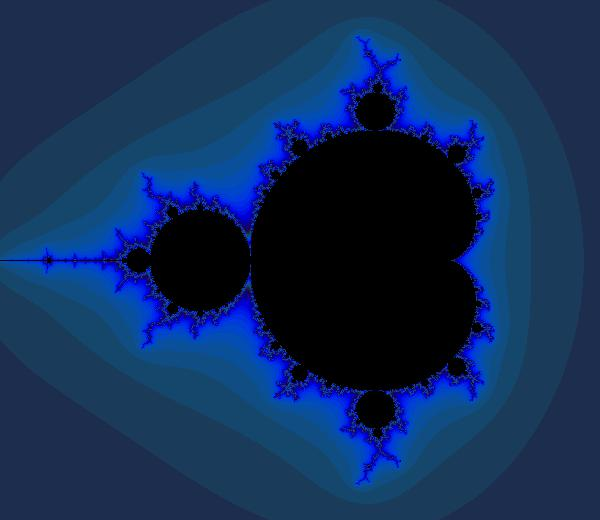

In [16]:
def DisplayFractal(a, fmt='jpeg'):
    a_cyclic = (6.28 * a / 20.0).reshape(list(a.shape) + [1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
                          30+50*np.sin(a_cyclic),
                          155-80*np.cos(a_cyclic)], 2)
    img[a == a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    PIL.Image.fromarray(a).save("mandelbrot.jpeg", fmt)
    display(Image(data="mandelbrot.jpeg"))
    
sess = tf.InteractiveSession()

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X + 1j * Y
xs = tf.constant(Z.astype("complex64"))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, "float32"))
tf.global_variables_initializer().run()

zs_ = zs*zs + xs
not_diverged = tf.abs(zs_) < 4
step = tf.group(
    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, "float32")))
for i in range(200): step.run()

DisplayFractal(ns.eval())

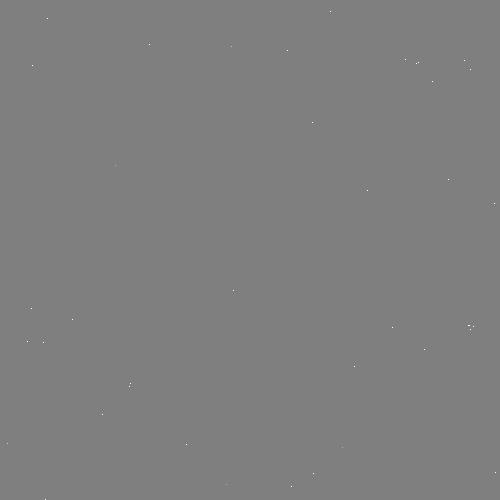

In [18]:
def DisplayArray(a, fmt='jpeg', rng=[0, 1]):
    """Display an array as a picture."""
    a = (a - rng[0]) / float(rng[1] - rng[0]) * 255
    a = np.uint8(np.clip(a, 0, 255))
    PIL.Image.fromarray(a).save("Result.jpeg", fmt)
    display(Image(data="Result.jpeg"))
def make_kernel(a):
    """Transform a 2D array into a convolution kernel."""
    a = np.asarray(a)
    a = a.reshape(list(a.shape) + [1, 1])
    return tf.constant(a, dtype=1)
def simple_conv(x, k):
    """A simplified 2D convolution operation."""
    x = tf.expand_dims(tf.expand_dims(x, 0), -1)
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
    return y[0, :, :, 0]
def laplace(x):
    """Compute the 2D laplacian of an array."""
    laplace_k = make_kernel([[0.5, 1.0, 0.5],
                             [1.0, -6., 1.0],
                             [0.5, 1.0, 0.5]])
    return simple_conv(x, laplace_k)
N = 500
u_init = np.zeros([N, N], dtype = 'float32')
ut_init = np.zeros([N, N], dtype = 'float32')

for n in range(40):
    a, b = np.random.randint(0, N, 2)
    u_init[a, b] = np.random.uniform()

DisplayArray(u_init, rng=[-0.1, 0.1])

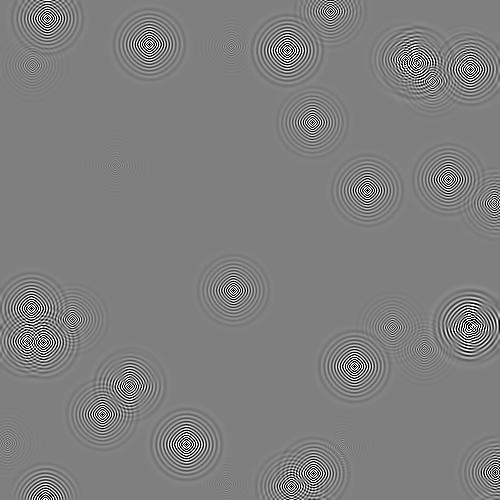

In [22]:
sess = tf.InteractiveSession()

eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

step = tf.group(U.assign(U_),
               Ut.assign(Ut_))
tf.global_variables_initializer().run()

for i in range(1000):
    step.run({eps : 0.03, damping : 0.04})
    if i % 50 == 0:
        clear_output()
        DisplayArray(U.eval(), rng=[-0.1, 0.1])